**Assignment: Movie Ratings & Revenue Analysis**

Step 1: Create a CSV – movies.csv

In [63]:
data="""MovieID,Title,Genre,ReleaseDate,Rating,Revenue,Budget
1,Inception,Sci-Fi,2010-07-16,8.8,825532764,160000000
2,The Dark Knight,Action,2008-07-18,9.0,1004558444,185000000
3,Titanic,Romance,1997-12-19,7.8,2187463944,200000000
4,Interstellar,Sci-Fi,2014-11-07,8.6,677471339,165000000
5,Joker,Drama,2019-10-04,8.4,1074251311,55000000
6,The Notebook,Romance,2004-06-25,7.9,,29000000
7,Avengers: Endgame,Action,2019-04-26,8.4,2797800564,356000000"""

with open('movies.csv', 'w') as f:
  f.write(data)

**PART 1: Pandas Operations**
1. Load movies.csv into a Pandas DataFrame.

In [64]:
import pandas as pd
import numpy as np
df=pd.read_csv('movies.csv')
print(df)

   MovieID              Title    Genre ReleaseDate  Rating       Revenue  \
0        1          Inception   Sci-Fi  2010-07-16     8.8  8.255328e+08   
1        2    The Dark Knight   Action  2008-07-18     9.0  1.004558e+09   
2        3            Titanic  Romance  1997-12-19     7.8  2.187464e+09   
3        4       Interstellar   Sci-Fi  2014-11-07     8.6  6.774713e+08   
4        5              Joker    Drama  2019-10-04     8.4  1.074251e+09   
5        6       The Notebook  Romance  2004-06-25     7.9           NaN   
6        7  Avengers: Endgame   Action  2019-04-26     8.4  2.797801e+09   

      Budget  
0  160000000  
1  185000000  
2  200000000  
3  165000000  
4   55000000  
5   29000000  
6  356000000  


2. Convert ReleaseDate to datetime.

In [65]:
df['ReleaseDate']=pd.to_datetime(df['ReleaseDate'])
print(df)

   MovieID              Title    Genre ReleaseDate  Rating       Revenue  \
0        1          Inception   Sci-Fi  2010-07-16     8.8  8.255328e+08   
1        2    The Dark Knight   Action  2008-07-18     9.0  1.004558e+09   
2        3            Titanic  Romance  1997-12-19     7.8  2.187464e+09   
3        4       Interstellar   Sci-Fi  2014-11-07     8.6  6.774713e+08   
4        5              Joker    Drama  2019-10-04     8.4  1.074251e+09   
5        6       The Notebook  Romance  2004-06-25     7.9           NaN   
6        7  Avengers: Endgame   Action  2019-04-26     8.4  2.797801e+09   

      Budget  
0  160000000  
1  185000000  
2  200000000  
3  165000000  
4   55000000  
5   29000000  
6  356000000  


3. Calculate Profit = Revenue - Budget .

In [66]:
df['Profit']=df['Revenue']-df['Budget']
print(df)

   MovieID              Title    Genre ReleaseDate  Rating       Revenue  \
0        1          Inception   Sci-Fi  2010-07-16     8.8  8.255328e+08   
1        2    The Dark Knight   Action  2008-07-18     9.0  1.004558e+09   
2        3            Titanic  Romance  1997-12-19     7.8  2.187464e+09   
3        4       Interstellar   Sci-Fi  2014-11-07     8.6  6.774713e+08   
4        5              Joker    Drama  2019-10-04     8.4  1.074251e+09   
5        6       The Notebook  Romance  2004-06-25     7.9           NaN   
6        7  Avengers: Endgame   Action  2019-04-26     8.4  2.797801e+09   

      Budget        Profit  
0  160000000  6.655328e+08  
1  185000000  8.195584e+08  
2  200000000  1.987464e+09  
3  165000000  5.124713e+08  
4   55000000  1.019251e+09  
5   29000000           NaN  
6  356000000  2.441801e+09  


4. Add a column "Era" :

Before 2000 → Classic

2000-2010 → Mid

After 2010 → Modern

In [67]:
df['Era']=np.where(df['ReleaseDate']<'2000-01-01','Classic',np.where(df['ReleaseDate']>'2010-12-31','Modern','Mid'))
print(df)

   MovieID              Title    Genre ReleaseDate  Rating       Revenue  \
0        1          Inception   Sci-Fi  2010-07-16     8.8  8.255328e+08   
1        2    The Dark Knight   Action  2008-07-18     9.0  1.004558e+09   
2        3            Titanic  Romance  1997-12-19     7.8  2.187464e+09   
3        4       Interstellar   Sci-Fi  2014-11-07     8.6  6.774713e+08   
4        5              Joker    Drama  2019-10-04     8.4  1.074251e+09   
5        6       The Notebook  Romance  2004-06-25     7.9           NaN   
6        7  Avengers: Endgame   Action  2019-04-26     8.4  2.797801e+09   

      Budget        Profit      Era  
0  160000000  6.655328e+08      Mid  
1  185000000  8.195584e+08      Mid  
2  200000000  1.987464e+09  Classic  
3  165000000  5.124713e+08   Modern  
4   55000000  1.019251e+09   Modern  
5   29000000           NaN      Mid  
6  356000000  2.441801e+09   Modern  


5. Handle nulls in Revenue by filling with average revenue.

In [68]:
df['Revenue']=df['Revenue'].fillna(df['Revenue'].mean())
print(df)

   MovieID              Title    Genre ReleaseDate  Rating       Revenue  \
0        1          Inception   Sci-Fi  2010-07-16     8.8  8.255328e+08   
1        2    The Dark Knight   Action  2008-07-18     9.0  1.004558e+09   
2        3            Titanic  Romance  1997-12-19     7.8  2.187464e+09   
3        4       Interstellar   Sci-Fi  2014-11-07     8.6  6.774713e+08   
4        5              Joker    Drama  2019-10-04     8.4  1.074251e+09   
5        6       The Notebook  Romance  2004-06-25     7.9  1.427846e+09   
6        7  Avengers: Endgame   Action  2019-04-26     8.4  2.797801e+09   

      Budget        Profit      Era  
0  160000000  6.655328e+08      Mid  
1  185000000  8.195584e+08      Mid  
2  200000000  1.987464e+09  Classic  
3  165000000  5.124713e+08   Modern  
4   55000000  1.019251e+09   Modern  
5   29000000           NaN      Mid  
6  356000000  2.441801e+09   Modern  


6. Sort by Rating descending.

In [69]:
print(df.sort_values(by='Rating',ascending=False))

   MovieID              Title    Genre ReleaseDate  Rating       Revenue  \
1        2    The Dark Knight   Action  2008-07-18     9.0  1.004558e+09   
0        1          Inception   Sci-Fi  2010-07-16     8.8  8.255328e+08   
3        4       Interstellar   Sci-Fi  2014-11-07     8.6  6.774713e+08   
6        7  Avengers: Endgame   Action  2019-04-26     8.4  2.797801e+09   
4        5              Joker    Drama  2019-10-04     8.4  1.074251e+09   
5        6       The Notebook  Romance  2004-06-25     7.9  1.427846e+09   
2        3            Titanic  Romance  1997-12-19     7.8  2.187464e+09   

      Budget        Profit      Era  
1  185000000  8.195584e+08      Mid  
0  160000000  6.655328e+08      Mid  
3  165000000  5.124713e+08   Modern  
6  356000000  2.441801e+09   Modern  
4   55000000  1.019251e+09   Modern  
5   29000000           NaN      Mid  
2  200000000  1.987464e+09  Classic  


7. Group by Genre → average Rating & total Revenue.

In [70]:
print(df.groupby('Genre').agg({'Rating':'mean','Revenue':'sum'}))

         Rating       Revenue
Genre                        
Action     8.70  3.802359e+09
Drama      8.40  1.074251e+09
Romance    7.85  3.615310e+09
Sci-Fi     8.70  1.503004e+09


8. Filter movies with Rating ≥ 8.5 and Profit >
500M.

In [71]:
print(df[(df['Rating']>=8.5)&(df['Profit']>500000000)])

   MovieID            Title   Genre ReleaseDate  Rating       Revenue  \
0        1        Inception  Sci-Fi  2010-07-16     8.8  8.255328e+08   
1        2  The Dark Knight  Action  2008-07-18     9.0  1.004558e+09   
3        4     Interstellar  Sci-Fi  2014-11-07     8.6  6.774713e+08   

      Budget       Profit     Era  
0  160000000  665532764.0     Mid  
1  185000000  819558444.0     Mid  
3  165000000  512471339.0  Modern  


9. Plot bar chart of Movie Title vs Profit.

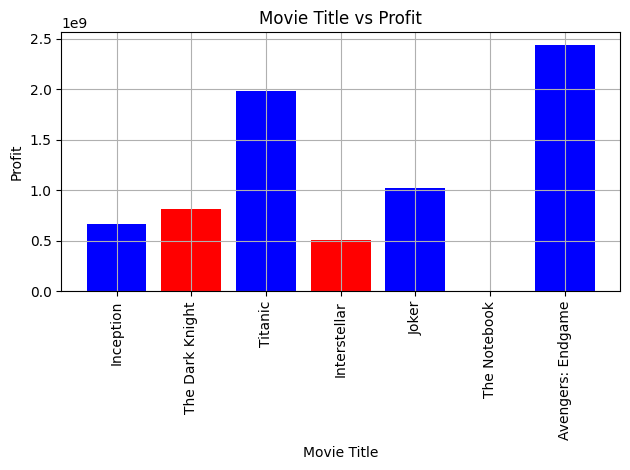

In [72]:
import matplotlib.pyplot as plt
plt.bar(df['Title'],df['Profit'],color=['blue','red'])
plt.xlabel('Movie Title')
plt.ylabel('Profit')
plt.xticks(rotation=90)
plt.title('Movie Title vs Profit')
plt.grid(True)
plt.tight_layout()
plt.show()

**PART 2: PySpark Operations**

1. Read the same CSV using PySpark.

In [73]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
spark=SparkSession.builder.appName('movies').getOrCreate()
df=spark.read.csv('movies.csv',header=True,inferSchema=True)
df.show()

+-------+-----------------+-------+-----------+------+----------+---------+
|MovieID|            Title|  Genre|ReleaseDate|Rating|   Revenue|   Budget|
+-------+-----------------+-------+-----------+------+----------+---------+
|      1|        Inception| Sci-Fi| 2010-07-16|   8.8| 825532764|160000000|
|      2|  The Dark Knight| Action| 2008-07-18|   9.0|1004558444|185000000|
|      3|          Titanic|Romance| 1997-12-19|   7.8|2187463944|200000000|
|      4|     Interstellar| Sci-Fi| 2014-11-07|   8.6| 677471339|165000000|
|      5|            Joker|  Drama| 2019-10-04|   8.4|1074251311| 55000000|
|      6|     The Notebook|Romance| 2004-06-25|   7.9|      NULL| 29000000|
|      7|Avengers: Endgame| Action| 2019-04-26|   8.4|2797800564|356000000|
+-------+-----------------+-------+-----------+------+----------+---------+



2. Create Profit column ( Revenue - Budget ).

In [74]:
df=df.withColumn('Profit',F.col('Revenue')-F.col('Budget'))
df.show()

+-------+-----------------+-------+-----------+------+----------+---------+----------+
|MovieID|            Title|  Genre|ReleaseDate|Rating|   Revenue|   Budget|    Profit|
+-------+-----------------+-------+-----------+------+----------+---------+----------+
|      1|        Inception| Sci-Fi| 2010-07-16|   8.8| 825532764|160000000| 665532764|
|      2|  The Dark Knight| Action| 2008-07-18|   9.0|1004558444|185000000| 819558444|
|      3|          Titanic|Romance| 1997-12-19|   7.8|2187463944|200000000|1987463944|
|      4|     Interstellar| Sci-Fi| 2014-11-07|   8.6| 677471339|165000000| 512471339|
|      5|            Joker|  Drama| 2019-10-04|   8.4|1074251311| 55000000|1019251311|
|      6|     The Notebook|Romance| 2004-06-25|   7.9|      NULL| 29000000|      NULL|
|      7|Avengers: Endgame| Action| 2019-04-26|   8.4|2797800564|356000000|2441800564|
+-------+-----------------+-------+-----------+------+----------+---------+----------+



3. Filter where Genre == 'Sci-Fi' and Profit > 500000000 .

In [75]:
df.filter((F.col('Genre')=='Sci-Fi')&(F.col('Profit')>500000000)).show()

+-------+------------+------+-----------+------+---------+---------+---------+
|MovieID|       Title| Genre|ReleaseDate|Rating|  Revenue|   Budget|   Profit|
+-------+------------+------+-----------+------+---------+---------+---------+
|      1|   Inception|Sci-Fi| 2010-07-16|   8.8|825532764|160000000|665532764|
|      4|Interstellar|Sci-Fi| 2014-11-07|   8.6|677471339|165000000|512471339|
+-------+------------+------+-----------+------+---------+---------+---------+



4. Group by Genre → avg(Rating) , sum(Profit)

In [76]:
df.groupBy('Genre').agg(F.avg('Rating'),F.sum('Profit')).show()

+-------+-----------+-----------+
|  Genre|avg(Rating)|sum(Profit)|
+-------+-----------+-----------+
|Romance|       7.85| 1987463944|
|  Drama|        8.4| 1019251311|
| Action|        8.7| 3261359008|
| Sci-Fi|        8.7| 1178004103|
+-------+-----------+-----------+



Use when().otherwise() to classify Rating as:

=9 → Blockbuster

8–9 → Hit

below 8 → Average

In [77]:
df=df.withColumn('Rating_category',F.when(F.col('Rating')==9,'Blockbuster').when((F.col('Rating')<=8)&(F.col('Rating')<9),'Hit').otherwise('Average'))
df.show()

+-------+-----------------+-------+-----------+------+----------+---------+----------+---------------+
|MovieID|            Title|  Genre|ReleaseDate|Rating|   Revenue|   Budget|    Profit|Rating_category|
+-------+-----------------+-------+-----------+------+----------+---------+----------+---------------+
|      1|        Inception| Sci-Fi| 2010-07-16|   8.8| 825532764|160000000| 665532764|        Average|
|      2|  The Dark Knight| Action| 2008-07-18|   9.0|1004558444|185000000| 819558444|    Blockbuster|
|      3|          Titanic|Romance| 1997-12-19|   7.8|2187463944|200000000|1987463944|            Hit|
|      4|     Interstellar| Sci-Fi| 2014-11-07|   8.6| 677471339|165000000| 512471339|        Average|
|      5|            Joker|  Drama| 2019-10-04|   8.4|1074251311| 55000000|1019251311|        Average|
|      6|     The Notebook|Romance| 2004-06-25|   7.9|      NULL| 29000000|      NULL|            Hit|
|      7|Avengers: Endgame| Action| 2019-04-26|   8.4|2797800564|35600000

6. Drop the Budget column.

In [78]:
df=df.drop('Budget')
df.show()

+-------+-----------------+-------+-----------+------+----------+----------+---------------+
|MovieID|            Title|  Genre|ReleaseDate|Rating|   Revenue|    Profit|Rating_category|
+-------+-----------------+-------+-----------+------+----------+----------+---------------+
|      1|        Inception| Sci-Fi| 2010-07-16|   8.8| 825532764| 665532764|        Average|
|      2|  The Dark Knight| Action| 2008-07-18|   9.0|1004558444| 819558444|    Blockbuster|
|      3|          Titanic|Romance| 1997-12-19|   7.8|2187463944|1987463944|            Hit|
|      4|     Interstellar| Sci-Fi| 2014-11-07|   8.6| 677471339| 512471339|        Average|
|      5|            Joker|  Drama| 2019-10-04|   8.4|1074251311|1019251311|        Average|
|      6|     The Notebook|Romance| 2004-06-25|   7.9|      NULL|      NULL|            Hit|
|      7|Avengers: Endgame| Action| 2019-04-26|   8.4|2797800564|2441800564|        Average|
+-------+-----------------+-------+-----------+------+----------+-----

7. Fill null revenue with average (use na.fill() or na.replace() ).

In [79]:
df = df.na.fill({'Revenue': df.agg(F.avg('Revenue')).collect()[0][0]})
df.show()

+-------+-----------------+-------+-----------+------+----------+----------+---------------+
|MovieID|            Title|  Genre|ReleaseDate|Rating|   Revenue|    Profit|Rating_category|
+-------+-----------------+-------+-----------+------+----------+----------+---------------+
|      1|        Inception| Sci-Fi| 2010-07-16|   8.8| 825532764| 665532764|        Average|
|      2|  The Dark Knight| Action| 2008-07-18|   9.0|1004558444| 819558444|    Blockbuster|
|      3|          Titanic|Romance| 1997-12-19|   7.8|2187463944|1987463944|            Hit|
|      4|     Interstellar| Sci-Fi| 2014-11-07|   8.6| 677471339| 512471339|        Average|
|      5|            Joker|  Drama| 2019-10-04|   8.4|1074251311|1019251311|        Average|
|      6|     The Notebook|Romance| 2004-06-25|   7.9|1427846394|      NULL|            Hit|
|      7|Avengers: Endgame| Action| 2019-04-26|   8.4|2797800564|2441800564|        Average|
+-------+-----------------+-------+-----------+------+----------+-----

8. Convert ReleaseDate to date type, extract year and month .

In [80]:
df=df.withColumn('ReleaseDate',F.to_date(F.col('ReleaseDate')))
df.withColumn("Year",F.year('ReleaseDate')).withColumn('month',F.month('ReleaseDate')).show()
df.show()

+-------+-----------------+-------+-----------+------+----------+----------+---------------+----+-----+
|MovieID|            Title|  Genre|ReleaseDate|Rating|   Revenue|    Profit|Rating_category|Year|month|
+-------+-----------------+-------+-----------+------+----------+----------+---------------+----+-----+
|      1|        Inception| Sci-Fi| 2010-07-16|   8.8| 825532764| 665532764|        Average|2010|    7|
|      2|  The Dark Knight| Action| 2008-07-18|   9.0|1004558444| 819558444|    Blockbuster|2008|    7|
|      3|          Titanic|Romance| 1997-12-19|   7.8|2187463944|1987463944|            Hit|1997|   12|
|      4|     Interstellar| Sci-Fi| 2014-11-07|   8.6| 677471339| 512471339|        Average|2014|   11|
|      5|            Joker|  Drama| 2019-10-04|   8.4|1074251311|1019251311|        Average|2019|   10|
|      6|     The Notebook|Romance| 2004-06-25|   7.9|1427846394|      NULL|            Hit|2004|    6|
|      7|Avengers: Endgame| Action| 2019-04-26|   8.4|2797800564

9. Use a window function to rank movies within each genre by profit.

In [81]:
from pyspark.sql.window import Window
window_spec=Window.partitionBy('Genre').orderBy(F.col('Profit').desc())
df=df.withColumn('rank',F.rank().over(window_spec))
df.show()

+-------+-----------------+-------+-----------+------+----------+----------+---------------+----+
|MovieID|            Title|  Genre|ReleaseDate|Rating|   Revenue|    Profit|Rating_category|rank|
+-------+-----------------+-------+-----------+------+----------+----------+---------------+----+
|      7|Avengers: Endgame| Action| 2019-04-26|   8.4|2797800564|2441800564|        Average|   1|
|      2|  The Dark Knight| Action| 2008-07-18|   9.0|1004558444| 819558444|    Blockbuster|   2|
|      5|            Joker|  Drama| 2019-10-04|   8.4|1074251311|1019251311|        Average|   1|
|      3|          Titanic|Romance| 1997-12-19|   7.8|2187463944|1987463944|            Hit|   1|
|      6|     The Notebook|Romance| 2004-06-25|   7.9|1427846394|      NULL|            Hit|   2|
|      1|        Inception| Sci-Fi| 2010-07-16|   8.8| 825532764| 665532764|        Average|   1|
|      4|     Interstellar| Sci-Fi| 2014-11-07|   8.6| 677471339| 512471339|        Average|   2|
+-------+-----------

**PART 3: JSON + Union Example**
1. Read this JSON using PySpark.

In [82]:
import json
data=[
{"MovieID": 8, "Title": "Barbie", "Genre": "Drama", "Rating": 7.5, "Revenue":
1456000000, "Budget": 145000000},
{"MovieID": 9, "Title": "Oppenheimer", "Genre": "Drama", "Rating": 8.6, "Revenue":
950000000, "Budget": 100000000}
]

with open('movies_bonus.json','w')as file:
  json.dump(data,file,indent=4)

df_j=spark.read.json('movies_bonus.json',multiLine=True)
df_j.show()

+---------+-----+-------+------+----------+-----------+
|   Budget|Genre|MovieID|Rating|   Revenue|      Title|
+---------+-----+-------+------+----------+-----------+
|145000000|Drama|      8|   7.5|1456000000|     Barbie|
|100000000|Drama|      9|   8.6| 950000000|Oppenheimer|
+---------+-----+-------+------+----------+-----------+



2. Union it with your original movies DataFrame.

In [83]:
df_union=df.unionByName(df_j,allowMissingColumns=True)
df_union.show()

+-------+-----------------+-------+-----------+------+----------+----------+---------------+----+---------+
|MovieID|            Title|  Genre|ReleaseDate|Rating|   Revenue|    Profit|Rating_category|rank|   Budget|
+-------+-----------------+-------+-----------+------+----------+----------+---------------+----+---------+
|      7|Avengers: Endgame| Action| 2019-04-26|   8.4|2797800564|2441800564|        Average|   1|     NULL|
|      2|  The Dark Knight| Action| 2008-07-18|   9.0|1004558444| 819558444|    Blockbuster|   2|     NULL|
|      5|            Joker|  Drama| 2019-10-04|   8.4|1074251311|1019251311|        Average|   1|     NULL|
|      3|          Titanic|Romance| 1997-12-19|   7.8|2187463944|1987463944|            Hit|   1|     NULL|
|      6|     The Notebook|Romance| 2004-06-25|   7.9|1427846394|      NULL|            Hit|   2|     NULL|
|      1|        Inception| Sci-Fi| 2010-07-16|   8.8| 825532764| 665532764|        Average|   1|     NULL|
|      4|     Interstellar| 

3. Show top 5 highest grossing movies.

In [84]:
df_union.orderBy(F.col("Revenue").desc()).limit(5).show()

+-------+-----------------+-------+-----------+------+----------+----------+---------------+----+---------+
|MovieID|            Title|  Genre|ReleaseDate|Rating|   Revenue|    Profit|Rating_category|rank|   Budget|
+-------+-----------------+-------+-----------+------+----------+----------+---------------+----+---------+
|      7|Avengers: Endgame| Action| 2019-04-26|   8.4|2797800564|2441800564|        Average|   1|     NULL|
|      3|          Titanic|Romance| 1997-12-19|   7.8|2187463944|1987463944|            Hit|   1|     NULL|
|      8|           Barbie|  Drama|       NULL|   7.5|1456000000|      NULL|           NULL|NULL|145000000|
|      6|     The Notebook|Romance| 2004-06-25|   7.9|1427846394|      NULL|            Hit|   2|     NULL|
|      5|            Joker|  Drama| 2019-10-04|   8.4|1074251311|1019251311|        Average|   1|     NULL|
+-------+-----------------+-------+-----------+------+----------+----------+---------------+----+---------+



4. Save final merged DataFrame as CSV.

In [85]:
df_union.write.csv('movies_final.csv', header=True, mode='overwrite')

Bonus:

Create a column ReturnOnInvestment = Profit / Budget

In [86]:
df_union.show()
df_union=df_union.withColumn('Budget',F.col('Revenue')-F.col('Profit'))

+-------+-----------------+-------+-----------+------+----------+----------+---------------+----+---------+
|MovieID|            Title|  Genre|ReleaseDate|Rating|   Revenue|    Profit|Rating_category|rank|   Budget|
+-------+-----------------+-------+-----------+------+----------+----------+---------------+----+---------+
|      7|Avengers: Endgame| Action| 2019-04-26|   8.4|2797800564|2441800564|        Average|   1|     NULL|
|      2|  The Dark Knight| Action| 2008-07-18|   9.0|1004558444| 819558444|    Blockbuster|   2|     NULL|
|      5|            Joker|  Drama| 2019-10-04|   8.4|1074251311|1019251311|        Average|   1|     NULL|
|      3|          Titanic|Romance| 1997-12-19|   7.8|2187463944|1987463944|            Hit|   1|     NULL|
|      6|     The Notebook|Romance| 2004-06-25|   7.9|1427846394|      NULL|            Hit|   2|     NULL|
|      1|        Inception| Sci-Fi| 2010-07-16|   8.8| 825532764| 665532764|        Average|   1|     NULL|
|      4|     Interstellar| 

In [87]:
df_union=df_union.withColumn('ReturnOnInvestment',F.col('Profit')/F.col('Budget'))
df_union.show()

+-------+-----------------+-------+-----------+------+----------+----------+---------------+----+---------+------------------+
|MovieID|            Title|  Genre|ReleaseDate|Rating|   Revenue|    Profit|Rating_category|rank|   Budget|ReturnOnInvestment|
+-------+-----------------+-------+-----------+------+----------+----------+---------------+----+---------+------------------+
|      7|Avengers: Endgame| Action| 2019-04-26|   8.4|2797800564|2441800564|        Average|   1|356000000| 6.858990348314607|
|      2|  The Dark Knight| Action| 2008-07-18|   9.0|1004558444| 819558444|    Blockbuster|   2|185000000| 4.430045643243243|
|      5|            Joker|  Drama| 2019-10-04|   8.4|1074251311|1019251311|        Average|   1| 55000000| 18.53184201818182|
|      3|          Titanic|Romance| 1997-12-19|   7.8|2187463944|1987463944|            Hit|   1|200000000|        9.93731972|
|      6|     The Notebook|Romance| 2004-06-25|   7.9|1427846394|      NULL|            Hit|   2|     NULL|    

Show top ROI movies (minimum budget
50M)

In [88]:
filter_df=df_union.filter((F.col('Budget')>50000000)&(F.col('ReturnOnInvestment').isNotNull()))
filter_df.orderBy(F.col('ReturnOnInvestment').desc()).show()

+-------+-----------------+-------+-----------+------+----------+----------+---------------+----+---------+------------------+
|MovieID|            Title|  Genre|ReleaseDate|Rating|   Revenue|    Profit|Rating_category|rank|   Budget|ReturnOnInvestment|
+-------+-----------------+-------+-----------+------+----------+----------+---------------+----+---------+------------------+
|      5|            Joker|  Drama| 2019-10-04|   8.4|1074251311|1019251311|        Average|   1| 55000000| 18.53184201818182|
|      3|          Titanic|Romance| 1997-12-19|   7.8|2187463944|1987463944|            Hit|   1|200000000|        9.93731972|
|      7|Avengers: Endgame| Action| 2019-04-26|   8.4|2797800564|2441800564|        Average|   1|356000000| 6.858990348314607|
|      2|  The Dark Knight| Action| 2008-07-18|   9.0|1004558444| 819558444|    Blockbuster|   2|185000000| 4.430045643243243|
|      1|        Inception| Sci-Fi| 2010-07-16|   8.8| 825532764| 665532764|        Average|   1|160000000|    

Plot genre-wise ROI as a bar chart using Pandas

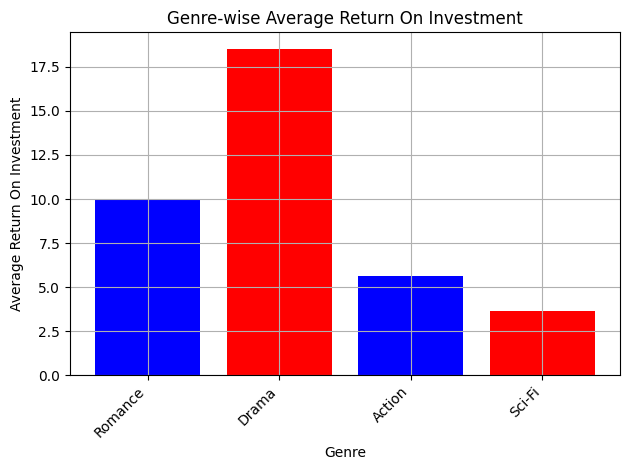

In [89]:
group_genre=filter_df.groupBy('Genre').agg(F.avg('ReturnOnInvestment').alias('avg_roi'))
group_genre_pd = group_genre.toPandas()
import matplotlib.pyplot as plt
plt.bar(group_genre_pd['Genre'],group_genre_pd['avg_roi'],color=['blue','red'])
plt.xlabel('Genre')
plt.ylabel('Average Return On Investment')
plt.xticks(rotation=45, ha='right')
plt.title('Genre-wise Average Return On Investment')
plt.tight_layout()
plt.grid(True)
plt.show()